In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
training_epochs = 15
batch_size = 100

In [4]:
print(device)

cpu


In [5]:
training_epoch = 150
batch_size = 100

In [6]:
mnist_train = dsets.MNIST(root='MNIST_data/', 
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

C:\Users\Admin\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True)

In [8]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [9]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [10]:
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y - Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost - ', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

Epoch :  0001 cost -  0.535150588
Epoch :  0002 cost -  0.359577745
Epoch :  0003 cost -  0.331264287
Epoch :  0004 cost -  0.316404700
Epoch :  0005 cost -  0.307106972
Epoch :  0006 cost -  0.300456554
Epoch :  0007 cost -  0.294933408
Epoch :  0008 cost -  0.290956199
Epoch :  0009 cost -  0.287074089
Epoch :  0010 cost -  0.284515619
Epoch :  0011 cost -  0.281914055
Epoch :  0012 cost -  0.279526860
Epoch :  0013 cost -  0.277636588
Epoch :  0014 cost -  0.275874794
Epoch :  0015 cost -  0.274422705
Epoch :  0016 cost -  0.272883654
Epoch :  0017 cost -  0.271629602
Epoch :  0018 cost -  0.270609766
Epoch :  0019 cost -  0.269295007
Epoch :  0020 cost -  0.268277317
Epoch :  0021 cost -  0.267255515
Epoch :  0022 cost -  0.266613424
Epoch :  0023 cost -  0.265661389
Epoch :  0024 cost -  0.264922321
Epoch :  0025 cost -  0.263888687
Epoch :  0026 cost -  0.263269812
Epoch :  0027 cost -  0.262586147
Epoch :  0028 cost -  0.261751622
Epoch :  0029 cost -  0.261135846
Epoch :  0030 

Accuracy :  0.8719000220298767
Label :  7
Prediction :  7


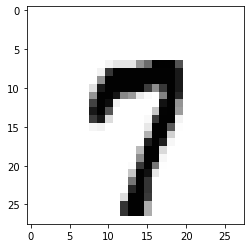

In [13]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())
    
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label : ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction : ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()